# Building a Neural Network from Scratch

http://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/


In this post we’re going to build a neural network from scratch. We’ll train it to recognize hand-written digits, using the famous MNIST data set.

We’ll use just basic Python with NumPy to build our network (no high-level stuff like Keras or TensorFlow). We will dip into scikit-learn, but only to get the MNIST data and to assess our model once its built.

---

#  (MNIST)
## data:  70000

In [1]:
import time
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
t0 = time.time()

In [3]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [4]:
print(type(mnist))
#print(mnist.shape)

print(type(X))
print(X.shape)

print(type(y))
print(y.shape)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(70000, 784)
<class 'numpy.ndarray'>
(70000,)


In [5]:
# We’ll normalize the data to keep our gradients manageable:

X = X / 255

In [6]:
# Then we’ll one-hot encode MNIST’s labels, to get a 10 x 70,000 array.

digits = 10
examples = y.shape[0]

print(y.shape)
y = y.reshape(1, examples)
print(type(y))
print(y.shape)

Y_new = np.eye(digits)[y.astype('int32')]
print(type(Y_new))
print(Y_new.shape)

Y_new = Y_new.T.reshape(digits, examples)
print(type(Y_new))
print(Y_new.shape)

(70000,)
<class 'numpy.ndarray'>
(1, 70000)
<class 'numpy.ndarray'>
(1, 70000, 10)
<class 'numpy.ndarray'>
(10, 70000)


In [7]:
print(type(y))
print(y.shape)

print(type(Y_new))
print(Y_new.shape)

<class 'numpy.ndarray'>
(1, 70000)
<class 'numpy.ndarray'>
(10, 70000)


In [8]:
# Then we re-split, re-shape, and re-shuffle our training set:

m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [9]:
print(type(X_train))
print(X_train.shape)

print(type(Y_train))
print(Y_train.shape)

print(type(X_test))
print(X_test.shape)

print(type(Y_test))
print(Y_test.shape)

<class 'numpy.ndarray'>
(784, 60000)
<class 'numpy.ndarray'>
(10, 60000)
<class 'numpy.ndarray'>
(784, 10000)
<class 'numpy.ndarray'>
(10, 10000)


In [10]:
print(type(X_train))
print(X_train.shape)

print(type(Y_train))
print(Y_train.shape)

<class 'numpy.ndarray'>
(784, 60000)
<class 'numpy.ndarray'>
(10, 60000)


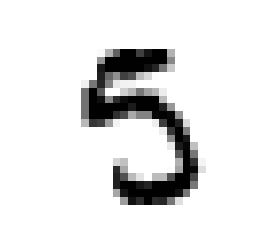

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
# A quick check that things are as they should be:

i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [12]:
#So let’s define:

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [13]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

### one hidden layer

In [14]:
# 4.5 Build & Train

n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.282446069514026
Epoch 100 cost:  0.7780882828822755
Epoch 200 cost:  0.5852474032349623
Epoch 300 cost:  0.5016984625378214
Epoch 400 cost:  0.4519854553590349
Epoch 500 cost:  0.41755708754491955
Epoch 600 cost:  0.3915522714486615
Epoch 700 cost:  0.37082507864675823
Epoch 800 cost:  0.3536663585473053
Epoch 900 cost:  0.33907321709044536
Epoch 1000 cost:  0.3264064309170943
Epoch 1100 cost:  0.3152357827367462
Epoch 1200 cost:  0.3052702656633586
Epoch 1300 cost:  0.29629945726494594
Epoch 1400 cost:  0.2881573102618223
Epoch 1500 cost:  0.28071292410665727
Epoch 1600 cost:  0.2738644853149811
Epoch 1700 cost:  0.267531458614318
Epoch 1800 cost:  0.261648981923142
Epoch 1900 cost:  0.25616357613941637
Final cost: 0.2510795058585822


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# Let’s see how we did:

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

index = 0
misclassifiedIndexes = []
for label, predict in zip(labels, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 943    0    7    2    2   13    8    3    8    5]
 [   0 1110    4    1    0    1    1    8    5    3]
 [   2    3  944   19    9    5   10   32   15    0]
 [   3    3   14  917    2   40    4    6   30   14]
 [   1    1    9    1  900    5   11    8   18   36]
 [  11    1    3   24    0  780   16    4   24   10]
 [  13    3    9    4   17   11  896    2   13    1]
 [   1    3   15   11    6    7    4  930    9   24]
 [   5   11   21   23    7   24    8    4  840   14]
 [   1    0    6    8   39    6    0   31   12  902]]
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       991
          1       0.98      0.98      0.98      1133
          2       0.91      0.91      0.91      1039
          3       0.91      0.89      0.90      1033
          4       0.92      0.91      0.91       990
          5       0.87      0.89      0.88       873
          6       0.94      0.92      0.93       969
          7       0.90      0.92      0.91  

In [17]:
print(len(misclassifiedIndexes))

838


In [18]:
print("Accuracy:  ", 1 - (len(misclassifiedIndexes)/10000))

Accuracy:   0.9162
